In [1]:
# Step 1: Importing necessary libraries
import pandas as pd

# Step 2: Reading the CSV file
file_path = r'C:\Users\TheBlessed\Documents\GADAC\gada_cap.csv'
data = pd.read_csv(file_path)

# Step 3: Display the first 5 rows of the dataset
data.head()


,employee_id,last_evaluation,number_project,tenure,overworked,salary_level,work_accident,left,average_monthly_hours,promotion_last_5years,department,satisfaction_level,workload_balance,training_hours,job_role_satisfaction
0,1,0.62,7,4,0,0,1,0,183,0,Marketing,0.73,5,13,5
1,2,0.53,2,2,1,2,0,0,152,1,HR,0.49,2,36,5
2,3,0.87,4,2,1,2,1,1,212,0,HR,0.67,3,8,3
3,4,0.43,2,5,1,0,0,1,163,0,Finance,0.44,2,24,3
4,5,0.67,7,7,1,0,1,0,198,0,IT,0.68,5,33,4


In [2]:
# Step 4: Display basic information about the dataset
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   employee_id            777 non-null    int64  
 1   last_evaluation        777 non-null    float64
 2   number_project         777 non-null    int64  
 3   tenure                 777 non-null    int64  
 4   overworked             777 non-null    int64  
 5   salary_level           777 non-null    int64  
 6   work_accident          777 non-null    int64  
 7   left                   777 non-null    int64  
 8   average_monthly_hours  777 non-null    int64  
 9   promotion_last_5years  777 non-null    int64  
 10  department             777 non-null    object 
 11  satisfaction_level     777 non-null    float64
 12  workload_balance       777 non-null    int64  
 13  training_hours         777 non-null    int64  
 14  job_role_satisfaction  777 non-null    int64  
dtypes: flo

In [3]:
# Step 5: Display descriptive statistics of numerical columns
data.describe()


,employee_id,last_evaluation,number_project,tenure,overworked,salary_level,work_accident,left,average_monthly_hours,promotion_last_5years,satisfaction_level,workload_balance,training_hours,job_role_satisfaction
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000
mean,389.000000,0.706113,4.032175,5.368082,0.494208,0.984556,0.513514,0.518662,198.425997,0.512227,0.562046,3.045045,25.185328,3.079794
std,224.444871,0.172567,1.983890,2.862108,0.500288,0.810542,0.500139,0.499973,29.620799,0.500172,0.261785,1.406641,14.887435,1.393585
min,1.000000,0.400000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,0.100000,1.000000,0.000000,1.000000
25%,195.000000,0.560000,2.000000,3.000000,0.000000,0.000000,0.000000,0.000000,172.000000,0.000000,0.340000,2.000000,12.000000,2.000000
50%,389.000000,0.700000,4.000000,5.000000,0.000000,1.000000,1.000000,1.000000,198.000000,1.000000,0.570000,3.000000,26.000000,3.000000
75%,583.000000,0.860000,6.000000,8.000000,1.000000,2.000000,1.000000,1.000000,225.000000,1.000000,0.790000,4.000000,38.000000,4.000000
max,777.000000,1.000000,7.000000,10.000000,1.000000,2.000000,1.000000,1.000000,250.000000,1.000000,1.000000,5.000000,50.000000,5.000000


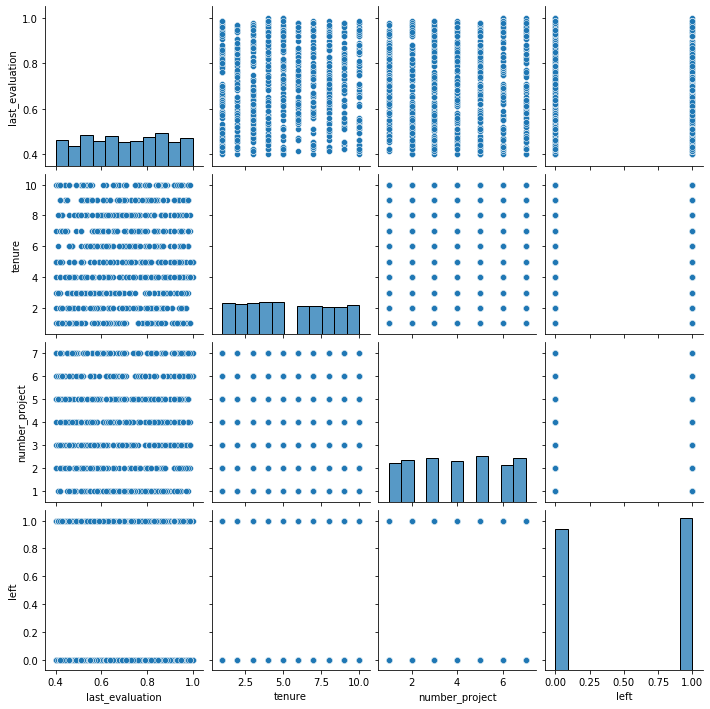

In [4]:
# Step 6: Importing visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Step 7: Plotting pairplot to visualize relationships
sns.pairplot(data[['last_evaluation', 'tenure', 'number_project', 'left']])
plt.show()


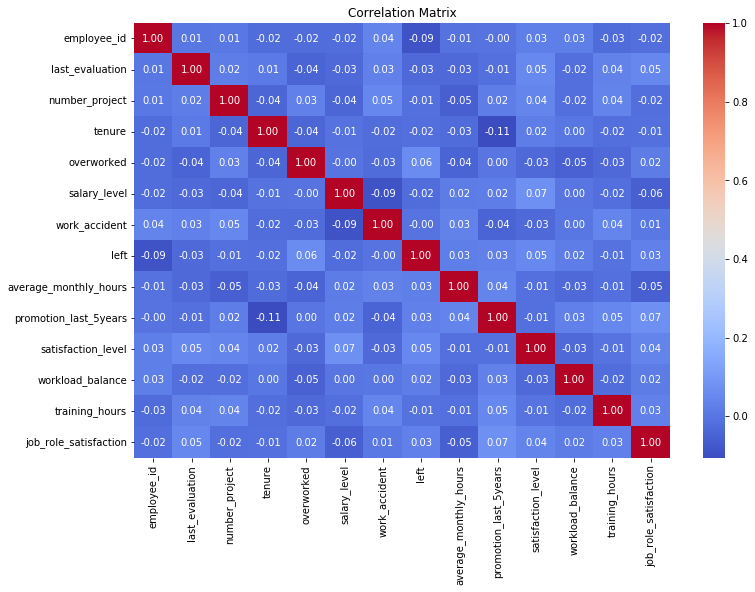

In [5]:
# Step 8: Calculate correlation matrix
corr_matrix = data.corr()

# Step 9: Plotting the heatmap to visualize correlations
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


In [6]:
# Step 10: Encoding categorical variables
from sklearn.preprocessing import LabelEncoder

# Encoding the 'department' column
label_encoder = LabelEncoder()
data['department'] = label_encoder.fit_transform(data['department'])


In [7]:
# Step 11: Splitting the data into training and testing sets
from sklearn.model_selection import train_test_split

# Features and target variable
X = data.drop('left', axis=1)
y = data['left']

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 12: Building the Decision Tree model
from sklearn.tree import DecisionTreeClassifier

# Initialize the model
model = DecisionTreeClassifier(random_state=42)

# Fit the model
model.fit(X_train, y_train)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')

In [8]:
# Step 13: Evaluating the model
from sklearn.metrics import accuracy_score, classification_report

# Predicting on test data
y_pred = model.predict(X_test)

# Evaluating accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

# Classification report
print(classification_report(y_test, y_pred))


Model Accuracy: 0.47
              precision    recall  f1-score   support

           0       0.45      0.37      0.41       113
           1       0.49      0.57      0.53       121

    accuracy                           0.47       234
   macro avg       0.47      0.47      0.47       234
weighted avg       0.47      0.47      0.47       234



In [9]:
# Step 14: Building the Random Forest model
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)

# Fit the model
rf_model.fit(X_train, y_train)

# Predicting on test data
rf_pred = rf_model.predict(X_test)

# Evaluating accuracy
rf_accuracy = accuracy_score(y_test, rf_pred)
print(f"Random Forest Model Accuracy: {rf_accuracy:.2f}")

# Classification report
print(classification_report(y_test, rf_pred))


Random Forest Model Accuracy: 0.48
              precision    recall  f1-score   support

           0       0.46      0.42      0.44       113
           1       0.50      0.54      0.52       121

    accuracy                           0.48       234
   macro avg       0.48      0.48      0.48       234
weighted avg       0.48      0.48      0.48       234



In [10]:
# Step 15: Hyperparameter Tuning with GridSearchCV
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Display best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)


Best Parameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 50}
Best Cross-Validation Score: 0.5340699815837937


C:\Users\TheBlessed\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [11]:
# Step 16: Applying the best parameters to the Random Forest model
best_rf_model = RandomForestClassifier(max_depth=10, min_samples_split=2, n_estimators=50, random_state=42)

# Fit the optimized model
best_rf_model.fit(X_train, y_train)

# Predicting on test data
best_rf_pred = best_rf_model.predict(X_test)

# Evaluating the optimized model
best_rf_accuracy = accuracy_score(y_test, best_rf_pred)
print(f"Optimized Random Forest Model Accuracy: {best_rf_accuracy:.2f}")

# Classification report
print(classification_report(y_test, best_rf_pred))


Optimized Random Forest Model Accuracy: 0.51
              precision    recall  f1-score   support

           0       0.49      0.46      0.47       113
           1       0.52      0.55      0.54       121

    accuracy                           0.51       234
   macro avg       0.51      0.51      0.51       234
weighted avg       0.51      0.51      0.51       234



In [12]:
# Step 1: Calculate Feature Importance using the optimized Random Forest model
importances = best_rf_model.feature_importances_
features = X.columns

# Creating a DataFrame to display the importance
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the feature importance
feature_importance_df


,Feature,Importance
0,employee_id,0.143605
7,average_monthly_hours,0.123903
12,training_hours,0.123421
10,satisfaction_level,0.118382
1,last_evaluation,0.110233
3,tenure,0.075231
2,number_project,0.057229
9,department,0.056156
13,job_role_satisfaction,0.052387
11,workload_balance,0.050088


In [13]:
# Step 2: Creating new features based on existing ones
# Adding a feature for hours per tenure (average monthly hours divided by tenure)
data['hours_per_tenure'] = data['average_monthly_hours'] / (data['tenure'] + 1)  # Adding 1 to avoid division by zero

# Check the first few rows to see the new feature
data.head()


,employee_id,last_evaluation,number_project,tenure,overworked,salary_level,work_accident,left,average_monthly_hours,promotion_last_5years,department,satisfaction_level,workload_balance,training_hours,job_role_satisfaction,hours_per_tenure
0,1,0.62,7,4,0,0,1,0,183,0,3,0.73,5,13,5,36.600000
1,2,0.53,2,2,1,2,0,0,152,1,1,0.49,2,36,5,50.666667
2,3,0.87,4,2,1,2,1,1,212,0,1,0.67,3,8,3,70.666667
3,4,0.43,2,5,1,0,0,1,163,0,0,0.44,2,24,3,27.166667
4,5,0.67,7,7,1,0,1,0,198,0,2,0.68,5,33,4,24.750000


In [14]:
# Step 3: Updating the features set to include the new feature
X = data.drop('left', axis=1)  # Ensure 'left' is still the target variable

# Splitting the updated data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 4: Re-training the optimized Random Forest model with the new feature
best_rf_model.fit(X_train, y_train)

# Predicting on the updated test data
new_rf_pred = best_rf_model.predict(X_test)

# Evaluating the updated model
new_rf_accuracy = accuracy_score(y_test, new_rf_pred)
print(f"Updated Random Forest Model Accuracy with New Feature: {new_rf_accuracy:.2f}")

# Classification report
print(classification_report(y_test, new_rf_pred))


Updated Random Forest Model Accuracy with New Feature: 0.45
              precision    recall  f1-score   support

           0       0.42      0.40      0.41       113
           1       0.47      0.50      0.48       121

    accuracy                           0.45       234
   macro avg       0.45      0.45      0.45       234
weighted avg       0.45      0.45      0.45       234



In [6]:
# Step 0: Load the dataset
import pandas as pd

# Load the data from the CSV file
file_path = r'C:\Users\TheBlessed\Documents\GADAC\gada_cap.csv'
data = pd.read_csv(file_path)

# Step 1: Splitting the data into training and testing sets
from sklearn.model_selection import train_test_split

# Features and target variable
X = data.drop('left', axis=1)  # Dropping the target column only
y = data['left']

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 2: Hyperparameter tuning for Decision Tree using Grid Search
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Define parameter grid for Decision Tree
param_grid = {
    'max_depth': [5, 10, 15, 20, None],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10]
}

# Initialize Grid Search with Decision Tree
grid_search_dt = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the model with Grid Search
grid_search_dt.fit(X_train, y_train)

# Get the best parameters and accuracy
print("Best Parameters for Decision Tree:", grid_search_dt.best_params_)
print("Best Cross-Validation Accuracy:", grid_search_dt.best_score_)

# Train Decision Tree with best parameters
best_dt_model = grid_search_dt.best_estimator_
best_dt_model.fit(X_train, y_train)

# Predicting on test data
best_dt_pred = best_dt_model.predict(X_test)

# Evaluating the optimized Decision Tree model
best_dt_accuracy = accuracy_score(y_test, best_dt_pred)
print(f"Optimized Decision Tree Model Accuracy: {best_dt_accuracy:.2f}")

# Classification report
print(classification_report(y_test, best_dt_pred))


ValueError: could not convert string to float: 'HR'

In [7]:
# Step 0: Import necessary libraries
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load the data from the CSV file
file_path = r'C:\Users\TheBlessed\Documents\GADAC\gada_cap.csv'
data = pd.read_csv(file_path)

# Encode the categorical 'department' column
label_encoder = LabelEncoder()
data['department'] = label_encoder.fit_transform(data['department'])

# Features and target variable
X = data.drop('left', axis=1)  # Dropping the target column only
y = data['left']

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define parameter grid for Decision Tree
param_grid = {
    'max_depth': [5, 10, 15, 20, None],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10]
}

# Initialize Grid Search with Decision Tree
grid_search_dt = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the model with Grid Search
grid_search_dt.fit(X_train, y_train)

# Get the best parameters and accuracy
print("Best Parameters for Decision Tree:", grid_search_dt.best_params_)
print("Best Cross-Validation Accuracy:", grid_search_dt.best_score_)

# Train Decision Tree with best parameters
best_dt_model = grid_search_dt.best_estimator_
best_dt_model.fit(X_train, y_train)

# Predicting on test data
best_dt_pred = best_dt_model.predict(X_test)

# Evaluating the optimized Decision Tree model
best_dt_accuracy = accuracy_score(y_test, best_dt_pred)
print(f"Optimized Decision Tree Model Accuracy: {best_dt_accuracy:.2f}")

# Classification report
print(classification_report(y_test, best_dt_pred))


Best Parameters for Decision Tree: {'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 2}
Best Cross-Validation Accuracy: 0.5285451197053407
Optimized Decision Tree Model Accuracy: 0.45
              precision    recall  f1-score   support

           0       0.42      0.36      0.39       113
           1       0.47      0.54      0.50       121

    accuracy                           0.45       234
   macro avg       0.45      0.45      0.45       234
weighted avg       0.45      0.45      0.45       234



C:\Users\TheBlessed\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [8]:
# Step: Training and tuning the Random Forest model
from sklearn.ensemble import RandomForestClassifier

# Define parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 15, 20],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10]
}

# Initialize Grid Search with Random Forest
grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the model with Grid Search
grid_search_rf.fit(X_train, y_train)

# Get the best parameters and accuracy
print("Best Parameters for Random Forest:", grid_search_rf.best_params_)
print("Best Cross-Validation Accuracy:", grid_search_rf.best_score_)

# Train Random Forest with best parameters
best_rf_model = grid_search_rf.best_estimator_
best_rf_model.fit(X_train, y_train)

# Predicting on test data
best_rf_pred = best_rf_model.predict(X_test)

# Evaluating the optimized Random Forest model
best_rf_accuracy = accuracy_score(y_test, best_rf_pred)
print(f"Optimized Random Forest Model Accuracy: {best_rf_accuracy:.2f}")

# Classification report
print(classification_report(y_test, best_rf_pred))


C:\Users\TheBlessed\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best Parameters for Random Forest: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Best Cross-Validation Accuracy: 0.5340699815837937
Optimized Random Forest Model Accuracy: 0.51
              precision    recall  f1-score   support

           0       0.49      0.46      0.47       113
           1       0.52      0.55      0.54       121

    accuracy                           0.51       234
   macro avg       0.51      0.51      0.51       234
weighted avg       0.51      0.51      0.51       234

